# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 33.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [ ]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_hh_income.shape
df_pct_poverty.shape
df_pct_completed_hs.shape
df_share_race_city.shape
df_fatalities.shape

(2535, 14)

In [ ]:
df_hh_income.columns
df_pct_poverty.columns
df_pct_completed_hs.columns
df_share_race_city.columns
df_fatalities.columns


Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [ ]:
print(f'is Nan value in this dataframe ? : {df_hh_income.isna().values.any()}')
print(f'Duplicate value : {df_hh_income.duplicated().values.any()}')

is Nan value in this dataframe ? : True
Duplicate value : False


In [ ]:
print(f'is Nan value in this dataframe ? : {df_pct_poverty.isna().values.any()}')
print(f'Duplicate value : {df_pct_poverty.duplicated().values.any()}')

is Nan value in this dataframe ? : False
Duplicate value : False


In [ ]:
print(f'is Nan value in this dataframe ? : {df_pct_completed_hs.isna().values.any()}')
print(f'Duplicate value : {df_pct_completed_hs.duplicated().values.any()}')

is Nan value in this dataframe ? : False
Duplicate value : False


In [ ]:
print(f'is Nan value in this dataframe ? : {df_share_race_city.isna().values.any()}')
print(f'Duplicate value : {df_share_race_city.duplicated().values.any()}')

is Nan value in this dataframe ? : False
Duplicate value : False


In [ ]:
print(f'is Nan value in this dataframe ? : {df_fatalities.isna().values.any()}')
print(f'Duplicate value : {df_fatalities.duplicated().values.any()}')

is Nan value in this dataframe ? : True
Duplicate value : False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [ ]:
df_hh_income = df_hh_income.replace(np.nan, 0)
df_fatalities = df_fatalities.replace(np.nan, 0)

OR

In [ ]:
df_hh_income = df_hh_income.fillna(0)
df_fatalities = df_fatalities.fillna(0)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

to change column name

In [ ]:
poverty_rate_by_state = df_pct_poverty.groupby('Geographic Area').agg({'poverty_rate':pd.Series.mean})

In [ ]:
bar = px.bar(x=poverty_rate_by_state.index, y=poverty_rate_by_state.poverty_rate)
bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [40]:
rate_by_state = df_pct_completed_hs.groupby('Geographic Area').agg({'percent_completed_hs':pd.Series.mean})
rate_by_state.sort_values('percent_completed_hs', ascending=False)

In [ ]:
bar = px.bar(x=rate_by_state.index, y=rate_by_state.percent_completed_hs)
bar.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [ ]:
plt.figure(figsize=(14,8), dpi=150)
plt.title('Relationship between Poverty Rates and High School Graduation Rates', fontsize=16)
ax1 = plt.gca()
ax2 = ax1.twinx() 

ax1.plot(poverty_rate_by_state.index, poverty_rate_by_state.poverty_rate, color="red", marker="o")
ax1.set_xlabel("State", fontsize = 14)
ax1.set_ylabel("Poverty Rate", color="red", fontsize=14)

ax2.plot(rate_by_state.index, rate_by_state.percent_completed_hs, color="green", marker="o")
ax2.set_ylabel("High School Graduation Rate",color="green", fontsize=14)

plt.draw()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [ ]:
sns.jointplot(x=poverty_rate_by_state.poverty_rate, y=rate_by_state.percent_completed_hs, kind='kde', height=10)
plt.show()


#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

In [ ]:
plt.figure(figsize=(8,6), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(x=poverty_rate_by_state.poverty_rate, 
            y=rate_by_state.percent_completed_hs,                      
            color="#2f4b7c",
            scatter_kws={'alpha': 0.3},
            line_kws={ 'color': '#ff7c43'}
           )
  ax.set(ylabel="Completed High School", xlabel="Poverty Rate")

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [ ]:
df_share_race_city = df_share_race_city.replace('(X)', '0') 
df_share_race_city = df_share_race_city.astype({'share_white':'float', 'share_black':'float', 'share_native_american':'float', 'share_asian':'float', 'share_hispanic':'float'})

racial_makeup = df_share_race_city.groupby('Geographic area').agg({'share_white':pd.Series.mean, 'share_black':pd.Series.mean, 'share_native_american':pd.Series.mean, 'share_asian':pd.Series.mean, 'share_hispanic':pd.Series.mean, })


In [ ]:
plt.figure(figsize=(10,6), dpi=200)
width=0.2

r1 = np.arange(len(racial_makeup))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]
r5 = [x + width for x in r4]

plt.bar(r1, racial_makeup.share_white, width=width, label='White')
plt.bar(r2, racial_makeup.share_black, width=width, label='Black')
plt.bar(r3, racial_makeup.share_native_american, width=width, label='Native American')
plt.bar(r4, racial_makeup.share_asian, width=width, label='Asian')
plt.bar(r5, racial_makeup.share_hispanic, width=width, label='Hispanic')

plt.xlabel('State', fontweight='bold')
plt.xticks([r + width for r in range(len(racial_makeup))], racial_makeup.index, rotation=45)

plt.legend()

plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [ ]:
# Do NOT run this code twice
df_fatalities.race = df_fatalities.race.str.replace('0', 'Other')
df_fatalities.race = df_fatalities.race.str.replace('A', 'Asian')
df_fatalities.race = df_fatalities.race.str.replace('W', 'White')
df_fatalities.race = df_fatalities.race.str.replace('B', 'Black')
df_fatalities.race = df_fatalities.race.str.replace('O', 'Other')
df_fatalities.race = df_fatalities.race.str.replace('H', 'Hispanic')
df_fatalities.race = df_fatalities.race.str.replace('N', 'Native American')
df_fatalities.race.fillna('0', inplace=True)

In [ ]:
px.pie(values=df_fatalities.race.value_counts(), 
       names=df_fatalities.race.unique(),
       hole=0.4,
       title='Distribution of People Killed by Race',
       width=900,
       height=800,
      )

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [ ]:
px.pie(values=df_fatalities.gender.value_counts(), 
       names=df_fatalities.gender.unique(),
       hole=0.4,
       title='Total Number of Deaths of Men vs Women',
       width=700,
       height=600,
      )

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [ ]:
death_by_gender = df_fatalities.groupby(['gender', 'manner_of_death']).agg({'manner_of_death':pd.Series.count})
death_by_gender

In [ ]:
px.box(death_by_gender, y="manner_of_death")

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [44]:
is_armed = df_fatalities[df_fatalities.armed == 'gun'].count()[0]
is_unarmed =  df_fatalities[df_fatalities.armed == 'unarmed'].count()[0]

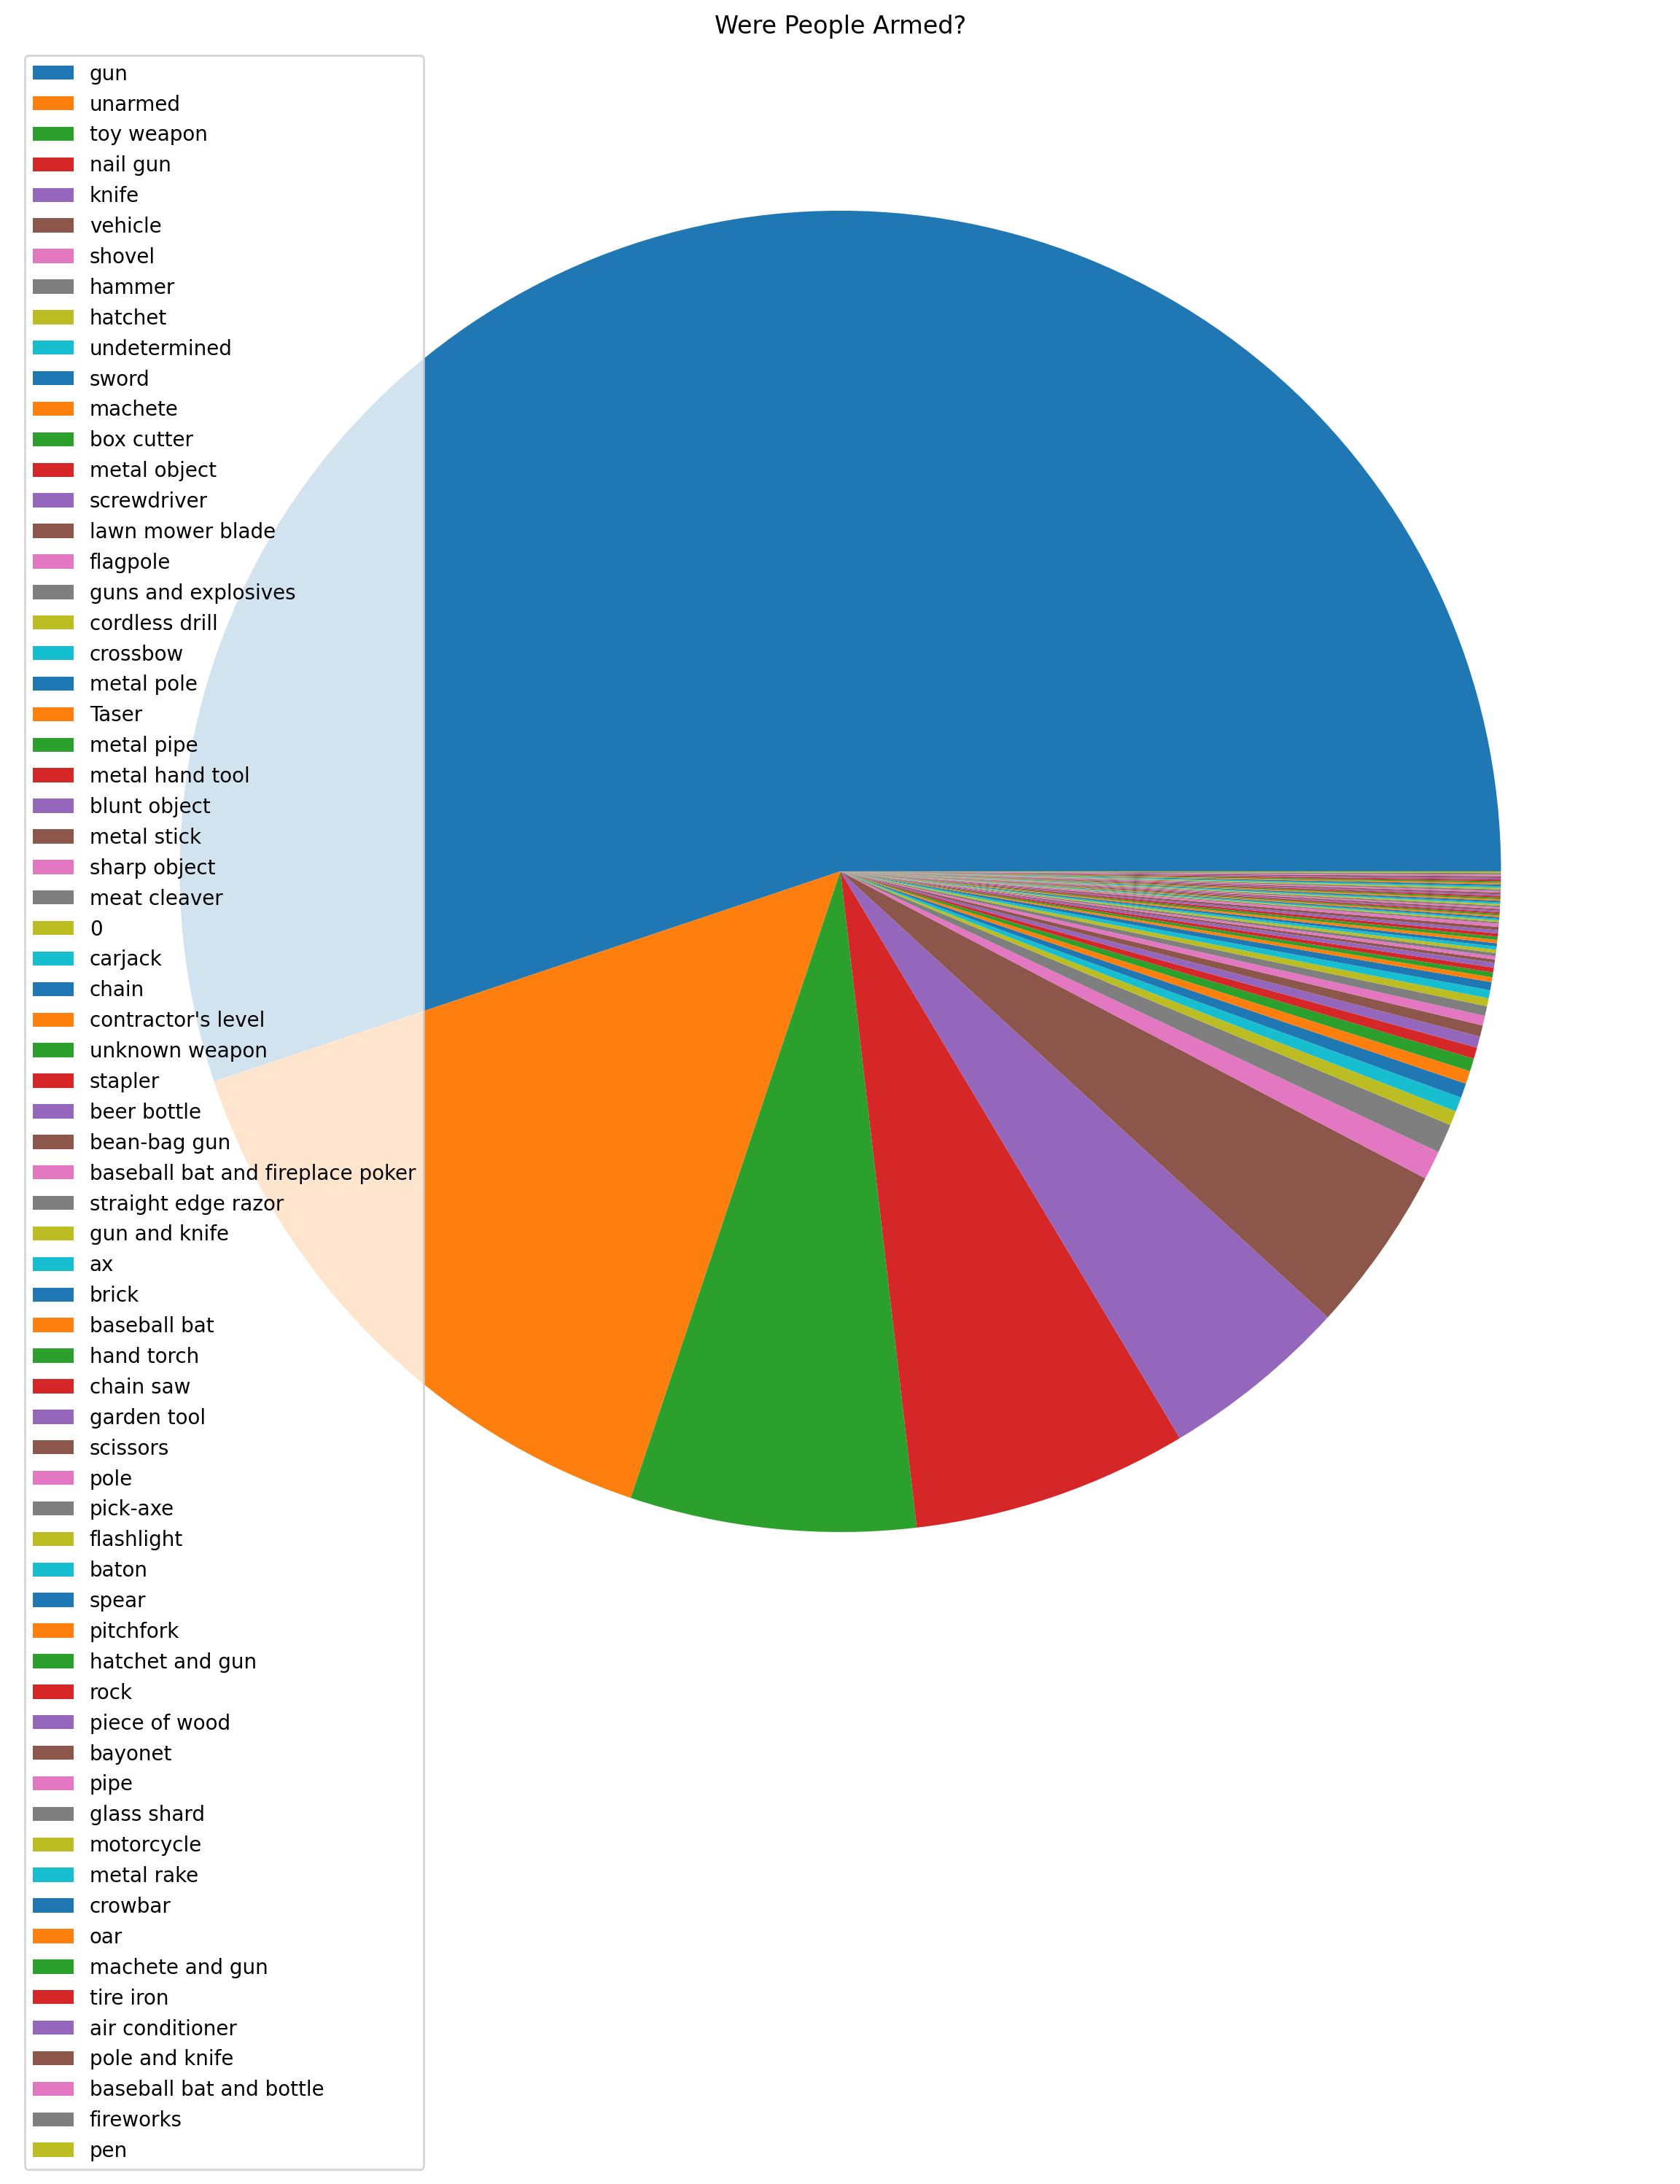

In [45]:
plt.figure(figsize=(10,10), dpi=200)

plt.pie(
        x=df_fatalities.armed.value_counts(),
        labels=df_fatalities.armed.unique(),
        labeldistance=None
       )
plt.legend()
plt.title('Were People Armed?')

fig = plt.gcf()
fig.set_size_inches(15,15)

fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [43]:
print(f"Number of people 25 years old who was killed: {df_fatalities[df_fatalities.age < 25].count()[0]}\nPercentage: {df_fatalities[df_fatalities.age < 25].count()[0] * 100/df_fatalities.count()[0]:.3}%")

Number of people 25 years old who was killed: 527
Percentage: 20.8%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

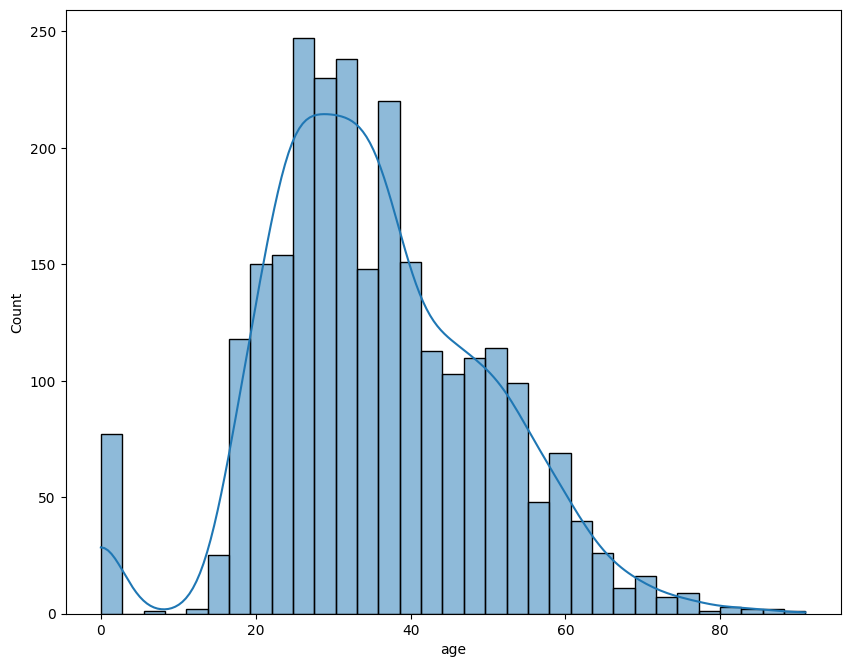

In [42]:
# 0 - No Data
plt.figure(figsize=(10,8), dpi=100)

sns.histplot(x=df_fatalities.age, kde=True)

plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

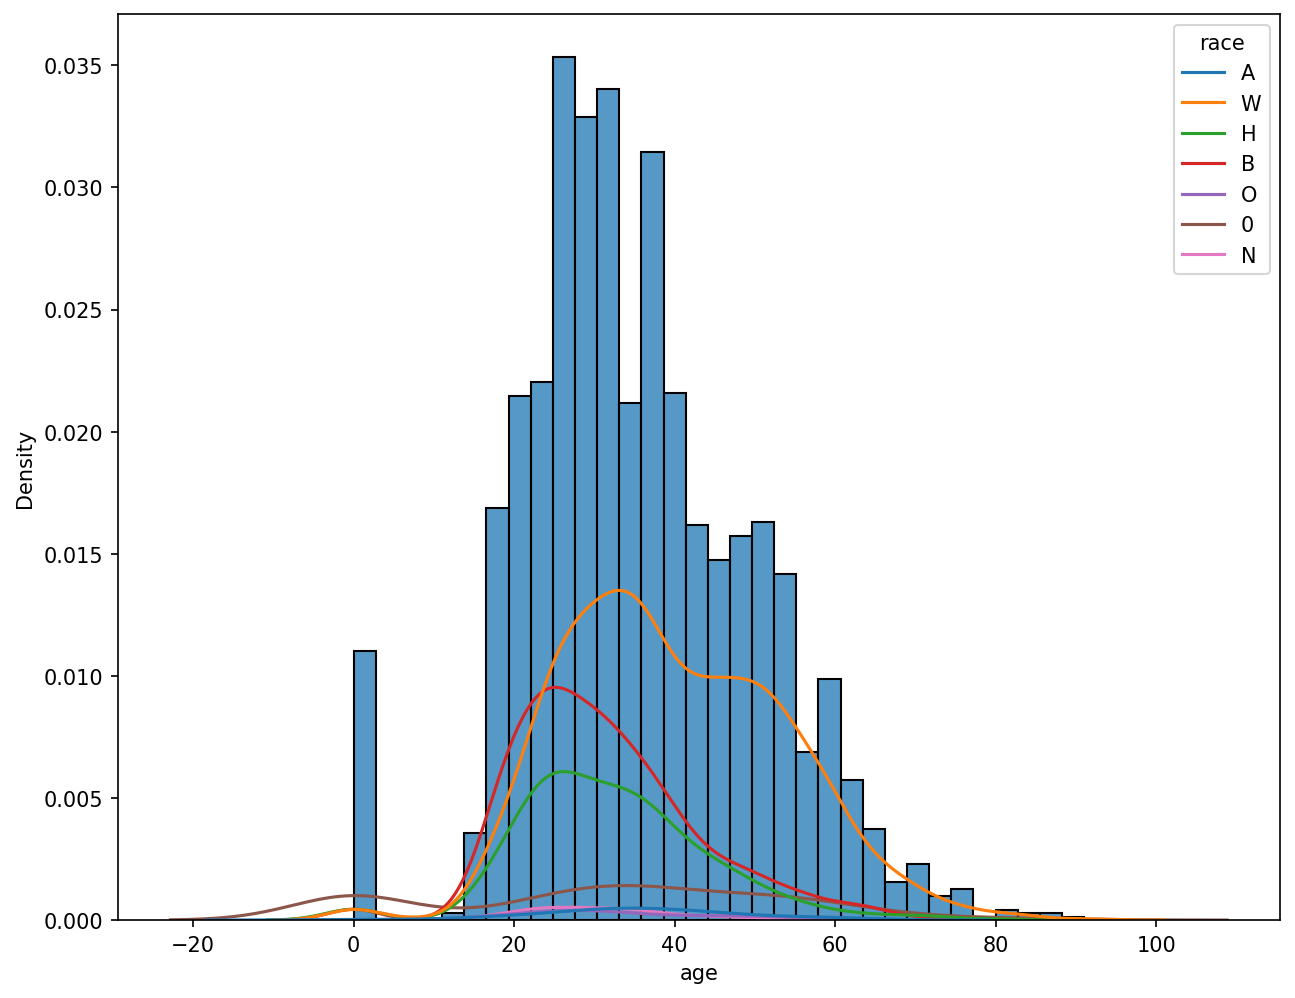

In [41]:
# 0 - No Data
plt.figure(figsize=(10,8), dpi=150)

sns.histplot(x=df_fatalities.age, stat='density')
sns.kdeplot(x=df_fatalities.age, hue=df_fatalities.race)

plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [47]:
plt.figure(figsize=(10,8), dpi=100)

sns.histplot(x=df_fatalities.race, kde=True)

plt.show()


# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [48]:
people_with_mental_illness = df_fatalities.signs_of_mental_illness.value_counts()
print(f"Number of people killed by police that have been diagnosed with a mental illness: {df_fatalities[df_fatalities.signs_of_mental_illness == True].count()[0]}\nPercentage: {df_fatalities[df_fatalities.signs_of_mental_illness == True].count()[0] * 100/df_fatalities.count()[0]:.4}%")

Number of people killed by police that have been diagnosed with a mental illness: 633
Percentage: 24.97%


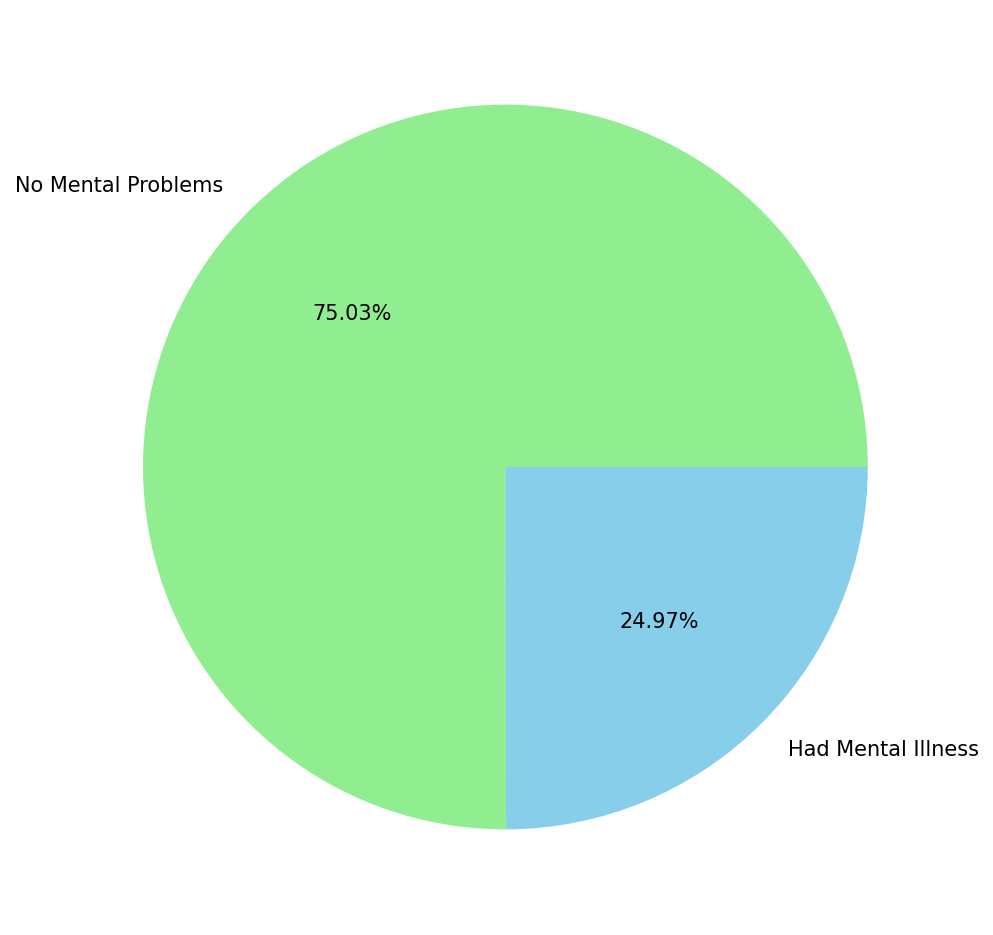

In [55]:
plt.figure(figsize=(10,8), dpi=150)

plt.pie(people_with_mental_illness,labels=["No Mental Problems", "Had Mental Illness"], autopct='%.2f%%', colors=["lightgreen","skyblue"])
plt.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [56]:
most_kill_by_city = df_fatalities.groupby('city').size()
most_kill_by_city = most_kill_by_city.sort_values(ascending=False).head(10)

In [57]:
px.pie(
    values=most_kill_by_city,
    names=most_kill_by_city.index,
    title='Top 10 Most Dangerous City',
    width=800,
    height=800,
)

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [58]:
la_city = df_share_race_city[df_share_race_city.City == "Los Angeles city"]
pheonix_city = df_share_race_city[(df_share_race_city.City == "Phoenix city") & (df_share_race_city["Geographic area"] == "AZ")]
houston_city = df_share_race_city[(df_share_race_city.City == "Houston city") & (df_share_race_city["Geographic area"] == "TX")]
chicago_city = df_share_race_city[df_share_race_city.City == "Chicago city"]
vegas_city = df_share_race_city[(df_share_race_city.City == "Las Vegas city") & (df_share_race_city["Geographic area"] == "NV")]
santonio_city = df_share_race_city[(df_share_race_city.City == "San Antonio city") & (df_share_race_city["Geographic area"] == "TX")]
columbus_city = df_share_race_city[(df_share_race_city.City == "Columbus city" ) & (df_share_race_city["Geographic area"] == "OH")]
miami_city = df_share_race_city[(df_share_race_city.City == "Miami city") & (df_share_race_city["Geographic area"] == "FL")]
austion_city = df_share_race_city[(df_share_race_city.City == "Austin city") & (df_share_race_city["Geographic area"] == "TX")]
stlouis_city = df_share_race_city[(df_share_race_city.City == "St. Louis city") & (df_share_race_city["Geographic area"] == "MI")]

x = pd.merge(la_city, pheonix_city, how="outer")
x = pd.merge(x, houston_city, how="outer")
x = pd.merge(x, chicago_city, how="outer")
x = pd.merge(x, vegas_city, how="outer")
x = pd.merge(x, santonio_city, how="outer")
x = pd.merge(x, miami_city, how="outer")
x = pd.merge(x, columbus_city, how="outer")
x = pd.merge(x, austion_city, how="outer")
x = pd.merge(x, stlouis_city, how="outer")
x

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,CA,Los Angeles city,49.8,9.6,0.7,11.3,48.5
1,AZ,Phoenix city,65.9,6.5,2.2,3.2,40.8
2,TX,Houston city,50.5,23.7,0.7,6,43.8
3,IL,Chicago city,45,32.9,0.5,5.5,28.9
4,NV,Las Vegas city,62.1,11.1,0.7,6.1,31.5
5,TX,San Antonio city,72.6,6.9,0.9,2.4,63.2
6,FL,Miami city,72.6,19.2,0.3,1,70
7,OH,Columbus city,61.5,28,0.3,4.1,5.6
8,TX,Austin city,68.3,8.1,0.9,6.3,35.1
9,MI,St. Louis city,67.7,29.1,0.6,0.2,5.7


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [59]:
death_by_state = df_fatalities.groupby('state').size()
death_by_state.sort_values(ascending=False, inplace=True)

px.choropleth(
    locations=death_by_state.index,
    locationmode='USA-states',
    color=death_by_state,
    scope='usa'
)

In [60]:
# Compare Poverty
px.choropleth(
    locations=poverty_rate_by_state.index,
    locationmode='USA-states',
    color=poverty_rate_by_state.poverty_rate,
    scope='usa'
)

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [62]:
df_fatalities.date = pd.to_datetime(df_fatalities.date)

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

kills_over_time = df_fatalities.groupby(pd.Grouper(key='date', freq='1M')).size()
kills_over_time

In [ ]:
plt.figure(figsize=(20, 18))

with sns.axes_style('darkgrid'):
  ax = plt.gca()
  ax.xaxis.update_units(kills_over_time.index)
  ax = sns.regplot( x=ax.xaxis.convert_units(kills_over_time.index),
                    y=kills_over_time,
                    scatter=True,
                    fit_reg=True,
                  )

  ax.xaxis.set_major_locator(years)
  ax.xaxis.set_major_formatter(years_fmt)
  ax.xaxis.set_minor_locator(months)

  ax.set_xlabel('Time')
  ax.set_ylabel('Kills Over Time')

plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).